In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import warnings

In [3]:
# Bx, pot, definition
zpos, bx = np.loadtxt('lngs_3perm_asym_Bx.txt').T
bn, bmax = normed(bx)

datadir = '/home/wonyongc/src/notebooks/ptolemy/LNGS_target/data'

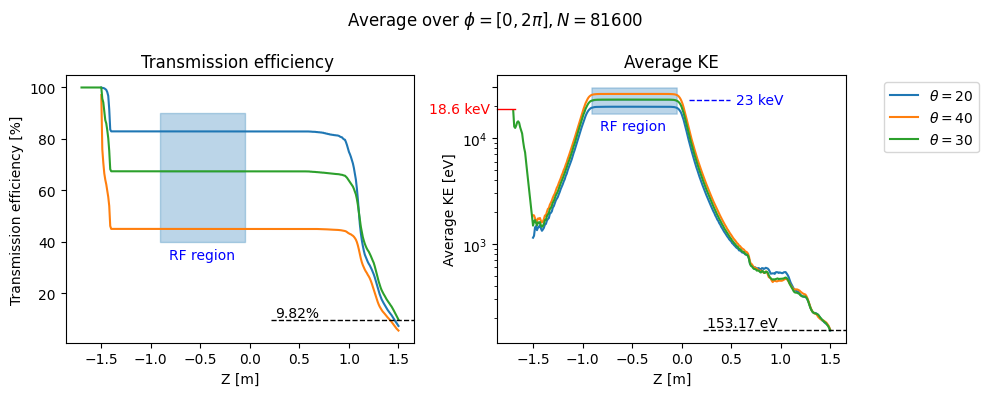

In [71]:
# Transmission for one theta, individual phis
import matplotlib.pyplot as plt
import numpy as np

transdir = '/home/wonyongc/src/notebooks/ptolemy/LNGS_target/transmission'

rows, cols = 1, 2
fig, (axCount, axE) = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

thetas_and_phis = { 
                    20: [0,45,90,135,180,225,270,315],
                    40: [0,45,90,135,180,225,270,315],
                    30: [0,45,90,135,180,225,270,315],
                }

N=10200

last_count_value = None  # Variable to store the last count value

for th,phis in thetas_and_phis.items():

    total_counts = None
    avg_energies = None

    for phi in phis:
        filename = f'th{th}_phi{phi}.txt'
        filepath = f'{transdir}/{filename}'
        z, counts, avgE = np.loadtxt(filepath, delimiter=',').T

        # Sum counts across all phis for the same theta
        if total_counts is None:
            total_counts = counts/N*100
            avg_energies = avgE
        else:
            total_counts += counts/N*100
            avg_energies += avgE

        # axCount.plot(z, counts, label=f'th={th}, phi={phi}')
        # axE.plot(z, avgE, label=f'th={th}, phi={phi}')

        # axCount.plot(z, counts/N*100, label=rf'$\phi={phi}\degree$', linestyle='dotted')
        # axE.plot(z, avgE, label=rf'$\phi={phi}\degree$', linestyle='dotted')

    # axCount.plot(z, total_counts/len(phis), label=f'Average', color='black')
    # axE.plot(z, avg_energies/len(phis), label=f'Average', color='black')
    
    axCount.plot(z, total_counts/len(phis), label=rf'$\theta={th}$')
    axE.plot(z, avg_energies/len(phis), label=rf'$\theta={th}$')

    last_count_value = total_counts[-1]/len(phis)  # Store the last count value
    last_E_value = avg_energies[-1]/len(phis)  # Store the last count value

legendpos=(1.4,1)
# axCount.set_title('Count vs Z for different thetas and phis')
axCount.set_title(rf"Transmission efficiency ")
axCount.set_xlabel('Z [m]')
axCount.set_ylabel('Transmission efficiency [%]')
# axCount.set_yscale('log')
# axCount.set_yticks([100, 1000, 10000])
# axCount.legend(loc='upper right', bbox_to_anchor=legendpos)

axE.set_title(f'Average KE')
axE.set_xlabel('Z [m]')
axE.set_ylabel('Average KE [eV]')
axE.set_yscale('log')
axE.set_yticks([100,1000, 10000, 30000])
axE.legend(loc='upper right', bbox_to_anchor=legendpos)

if last_count_value is not None:
    axCount.plot(
        [0.59,1],         # x in fraction of axes
        [last_count_value,      last_count_value],      # y in data coordinates
        color='black', linewidth=1, linestyle='--',
        transform=axCount.get_yaxis_transform(),  # tie x to axes fraction, y to data
        clip_on=False             # let it protrude outside the plot if needed
    )
    axCount.text(0.60, last_count_value, f'{last_count_value:.2f}%', color='black', fontsize=10,
             verticalalignment='bottom', horizontalalignment='left', transform=axCount.get_yaxis_transform())
if last_E_value is not None:
    axE.plot(
        [0.59,1],         # x in fraction of axes
        [last_E_value,      last_E_value],      # y in data coordinates
        color='black', linewidth=1, linestyle='--',
        transform=axE.get_yaxis_transform(),  # tie x to axes fraction, y to data
        clip_on=False             # let it protrude outside the plot if needed
    )
    axE.text(0.60, last_E_value, f'{last_E_value:.2f} eV', color='black', fontsize=10,
             verticalalignment='bottom', horizontalalignment='left', transform=axE.get_yaxis_transform())

y_val = 18600
tick_length = 0.05
axE.plot(
    [0, tick_length],         # x in fraction of axes
    [y_val,      y_val],      # y in data coordinates
    color='red', linewidth=1, linestyle='solid',
    transform=axE.get_yaxis_transform(),  # tie x to axes fraction, y to data
    clip_on=False             # let it protrude outside the plot if needed
)
axE.text(
    -0.02, y_val, "18.6 keV",
    ha='right', va='center', color='red',
    transform=axE.get_yaxis_transform()
)

z1,z2 = 75, 163
length = 300
RF_e = 23000

axE.fill_between(z[z1:z2], avg_energies[z1:z2]/len(phis), 17000, color='C0', alpha=0.3)
axE.fill_between(z[z1:z2], avg_energies[z1:z2]/len(phis), 30000, color='C0', alpha=0.3)
axE.text(
    117/length, 13000, "RF region",
    ha='center', va='center', color='blue',
    transform=axE.get_yaxis_transform()
)

axE.plot(
    [165/length, 200/length],         # x in fraction of axes
    [RF_e,      RF_e],      # y in data coordinates
    color='blue', linewidth=1, linestyle='dashed',
    transform=axE.get_yaxis_transform(),  # tie x to axes fraction, y to data
    clip_on=False             # let it protrude outside the plot if needed
)
axE.text(
    205/length, RF_e, "23 keV",
    ha='left', va='center', color='blue',
    transform=axE.get_yaxis_transform()
)




axCount.fill_between(z[z1:z2], total_counts[z1:z2]/len(phis), 40, color='C0', alpha=0.3)
axCount.fill_between(z[z1:z2], total_counts[z1:z2]/len(phis), 90, color='C0', alpha=0.3)
axCount.text(
    117/length, 35, "RF region",
    ha='center', va='center', color='blue',
    transform=axCount.get_yaxis_transform()
)


fig.suptitle(fr'Average over $\phi=[0,2\pi],N={N*8}$')

plt.tight_layout()
plt.show()

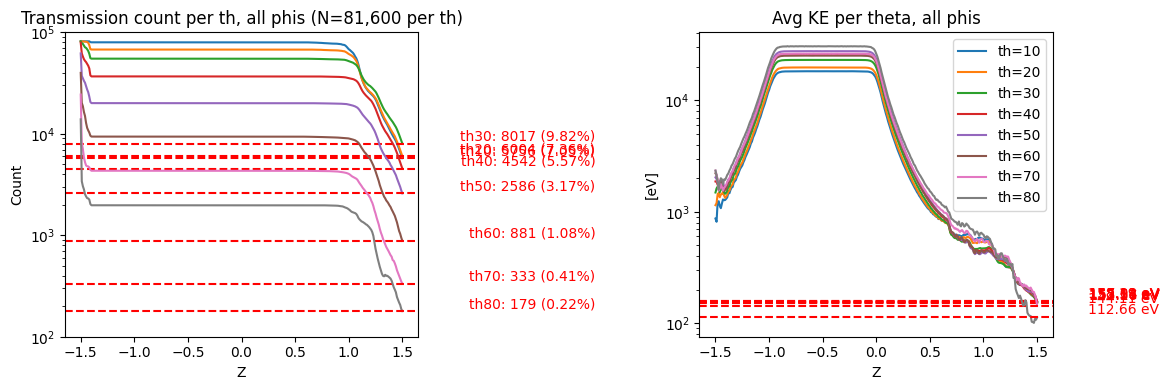

In [7]:
# Transmission for one theta, summing counts across all phis
import matplotlib.pyplot as plt
import numpy as np

transdir = '/home/wonyongc/src/notebooks/ptolemy/LNGS_target/transmission'

rows, cols = 1, 2
fig, (axCount, axE) = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

thetas_and_phis = { 
                    10: [0, 45, 90, 135, 180, 225, 270, 315],
                    20: [0, 45, 90, 135, 180, 225, 270, 315],
                    30: [0, 45, 90, 135, 180, 225, 270, 315],
                    40: [0, 45, 90, 135, 180, 225, 270, 315],
                    50: [0, 45, 90, 135, 180, 225, 270, 315],
                    60: [0, 45, 90, 135, 180, 225, 270, 315],
                    70: [0, 45, 90, 135, 180, 225, 270, 315],
                    80: [0, 45, 90, 135, 180, 225, 270, 315]
                    }

# axEff = axCount.twinx()

for th, phis in thetas_and_phis.items():
    total_counts = None
    avg_energies = None

    for phi in phis:
        filename = f'th{th}_phi{phi}.txt'
        filepath = f'{transdir}/{filename}'
        z, counts, avgE = np.loadtxt(filepath, delimiter=',').T

        # Sum counts across all phis for the same theta
        if total_counts is None:
            total_counts = counts
            avg_energies = avgE
        else:

            # Determine the size differences
            max_length = max(len(total_counts), len(counts))
            
            # Pad both arrays to the same size
            # total_counts = np.pad(total_counts, (0, max_length - len(total_counts)), 'constant')
            counts = np.pad(counts, (0, max_length - len(counts)), 'constant')
            
            # avg_energies = np.pad(avg_energies, (0, max_length - len(avg_energies)), 'constant')
            avgE = np.pad(avgE, (0, max_length - len(avgE)), 'constant')

            total_counts += counts
            avg_energies += avgE

    axCount.plot(z, total_counts, label=f'th={th}')
    axE.plot(z, avg_energies/len(phis), label=f'th={th}')

    last_count_value = total_counts[-1]  # Store the last count value
    last_E_value = avg_energies[-1]/len(phis)  # Store the last count value


    # Add a horizontal dotted line for the last count value and annotate it
    if last_count_value is not None:
        axCount.axhline(y=last_count_value, color='red', linestyle='--')
        percent = last_count_value/(len(phis)*10200)*100
        # axCount.text(0.35+0.35, last_count_value, f'th{th}: {last_count_value:.0f} ({percent:.2f}%)', color='red', fontsize=10,
        axCount.text(1.5, last_count_value, f'th{th}: {last_count_value:.0f} ({percent:.2f}%)', color='red', fontsize=10,
                verticalalignment='bottom', horizontalalignment='right', transform=axCount.get_yaxis_transform())

    if last_E_value is not None:
        axE.axhline(y=last_E_value, color='red', linestyle='--')
        axE.text(1.3, last_E_value, f'{last_E_value:.2f} eV', color='red', fontsize=10,
                verticalalignment='bottom', horizontalalignment='right', transform=axE.get_yaxis_transform())


axCount.set_title('Transmission count per th, all phis (N=81,600 per th)')
axCount.set_xlabel('Z')
axCount.set_ylabel('Count')
axCount.set_yscale('log')
axCount.set_ylim(100,100000)
# axCount.legend(loc='upper right')

# axEff.set_ylabel('Efficiency [%]')
# axEff.set_ylim(1,100)
# axEff.set_yscale('log')

axE.set_title('Avg KE per theta, all phis')
axE.set_xlabel('Z')
axE.set_ylabel('[eV]')
axE.set_yscale('log')
axE.legend()

fig.tight_layout()

plt.show()


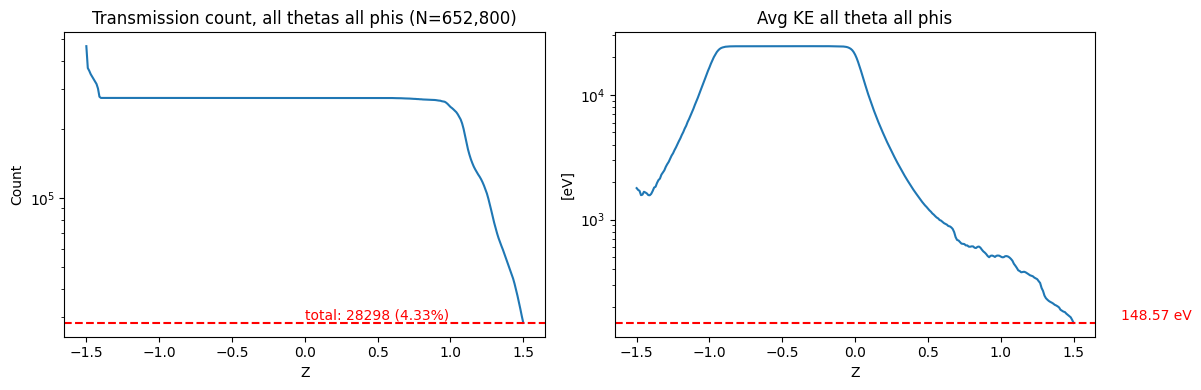

In [133]:
# Transmission sum all theta all phi
import matplotlib.pyplot as plt
import numpy as np

transdir = '/home/wonyongc/src/notebooks/ptolemy/LNGS_target/transmission'

rows, cols = 1, 2
fig, (axCount, axE) = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

thetas_and_phis = { 
                    10: [0, 45, 90, 135, 180, 225, 270, 315],
                    20: [0, 45, 90, 135, 180, 225, 270, 315],
                    30: [0, 45, 90, 135, 180, 225, 270, 315],
                    40: [0, 45, 90, 135, 180, 225, 270, 315],
                    50: [0, 45, 90, 135, 180, 225, 270, 315],
                    60: [0, 45, 90, 135, 180, 225, 270, 315],
                    70: [0, 45, 90, 135, 180, 225, 270, 315],
                    80: [0, 45, 90, 135, 180, 225, 270, 315]
                    }

# axEff = axCount.twinx()

total_counts = None
avg_energies = None

runs = 8*8

for th, phis in thetas_and_phis.items():

    for phi in phis:
        filename = f'th{th}_phi{phi}.txt'
        filepath = f'{transdir}/{filename}'
        z, counts, avgE = np.loadtxt(filepath, delimiter=',').T

        # Sum counts across all phis for the same theta
        if total_counts is None:
            total_counts = counts
            avg_energies = avgE
        else:

            # Determine the size differences
            max_length = max(len(total_counts), len(counts))
            
            # Pad both arrays to the same size
            # total_counts = np.pad(total_counts, (0, max_length - len(total_counts)), 'constant')
            counts = np.pad(counts, (0, max_length - len(counts)), 'constant')
            
            # avg_energies = np.pad(avg_energies, (0, max_length - len(avg_energies)), 'constant')
            avgE = np.pad(avgE, (0, max_length - len(avgE)), 'constant')

            total_counts += counts
            avg_energies += avgE

axCount.plot(z, total_counts, label=f'th={th}')
axE.plot(z, avg_energies/runs, label=f'th={th}')

last_count_value = total_counts[-1]  # Store the last count value
last_E_value = avg_energies[-1]/runs  # Store the last count value


# Add a horizontal dotted line for the last count value and annotate it
if last_count_value is not None:
    axCount.axhline(y=last_count_value, color='red', linestyle='--')
    percent = last_count_value/(runs*10200)*100
    axCount.text(0.80, last_count_value, f'total: {last_count_value:.0f} ({percent:.2f}%)', color='red', fontsize=10,
            verticalalignment='bottom', horizontalalignment='right', transform=axCount.get_yaxis_transform())

if last_E_value is not None:
    axE.axhline(y=last_E_value, color='red', linestyle='--')
    axE.text(0.015*th, last_E_value, f'{last_E_value:.2f} eV', color='red', fontsize=10,
            verticalalignment='bottom', horizontalalignment='right', transform=axE.get_yaxis_transform())


axCount.set_title('Transmission count, all thetas all phis (N=652,800)')
axCount.set_xlabel('Z')
axCount.set_ylabel('Count')
axCount.set_yscale('log')
# axCount.set_ylim(1020,102000)
# axCount.legend()

# axEff.set_ylabel('Efficiency [%]')
# axEff.set_ylim(1,100)
# axEff.set_yscale('log')

axE.set_title('Avg KE all theta all phis')
axE.set_xlabel('Z')
axE.set_ylabel('[eV]')
axE.set_yscale('log')
# axE.legend()

fig.tight_layout()

plt.show()
